In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load dataset
df = pd.read_csv('netflix_titles.csv')

# Basic info
print(df.shape)             # Rows and columns
print(df.info())            # Data types and non-null count
print(df.describe())        # Summary stats for numerical columns
print(df.head())            # First few rows
print(df.columns)           # Column names


(8807, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None
       release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000
  show_id     type                  title         direct

## Ask Meaningful Questions


What types of content are available (Movies, TV Shows)?

What are the most common genres?

Which countries contribute most to the content?

How has the number of Netflix releases changed over the years?

Are there any missing or inconsistent data?

What is the average duration of movies vs shows?

Which directors/producers contribute the most content?

##  Check for Missing Values

director      2634
cast           825
country        831
date_added      10
rating           4
duration         3
dtype: int64


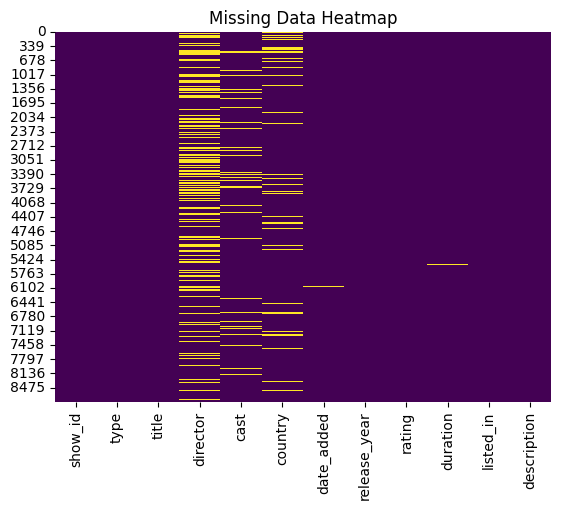

In [12]:
missing = df.isnull().sum()
print(missing[missing > 0])
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()


## Clean data

In [13]:
# Convert date column
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), format="%B %d, %Y", errors='coerce')

df['date_added'] = pd.to_datetime(df['date_added'])

# Extract year
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

# Clean duration
df[['duration_num', 'duration_unit']] = df['duration'].str.extract('(\d+)\s*(\w+)')
df['duration_num'] = pd.to_numeric(df['duration_num'])


##  Univariate Analysis (Single Variable Trends)

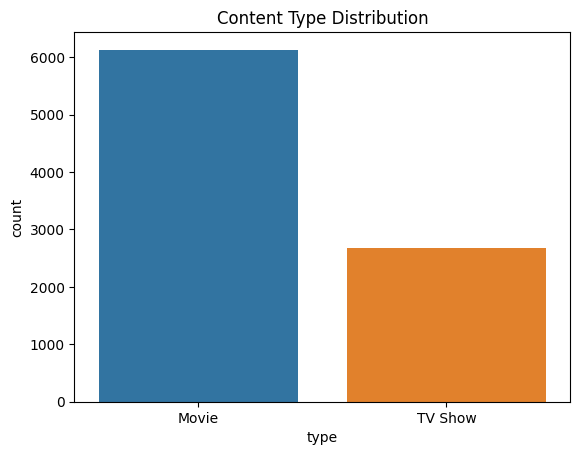

In [14]:
sns.countplot(data=df, x='type')
plt.title("Content Type Distribution")
plt.show()


## Top Genres

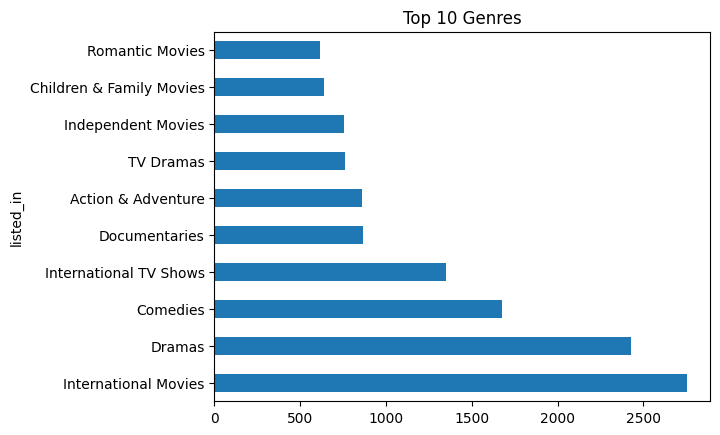

In [15]:
df['listed_in'].str.split(', ').explode().value_counts().head(10).plot(kind='barh')
plt.title("Top 10 Genres")
plt.show()


## Top Countries

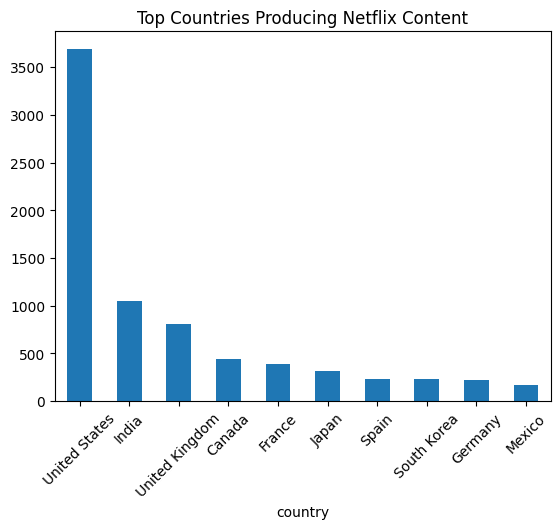

In [16]:
df['country'].str.split(', ').explode().value_counts().head(10).plot(kind='bar')
plt.title("Top Countries Producing Netflix Content")
plt.xticks(rotation=45)
plt.show()


##  Time-based Analysis

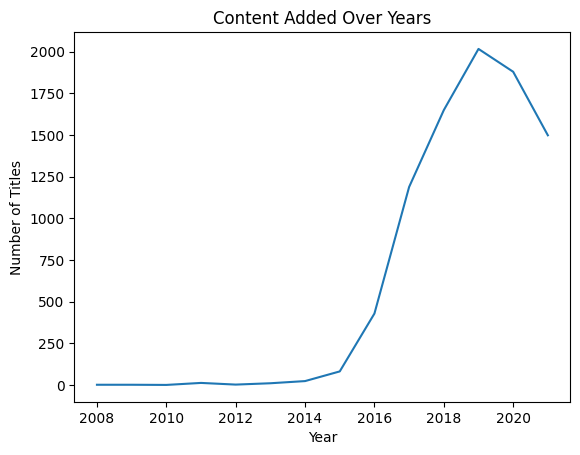

In [17]:
df['year_added'].value_counts().sort_index().plot(kind='line')
plt.title("Content Added Over Years")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.show()


##  Hypothesis Testing and Bivariate Analysis

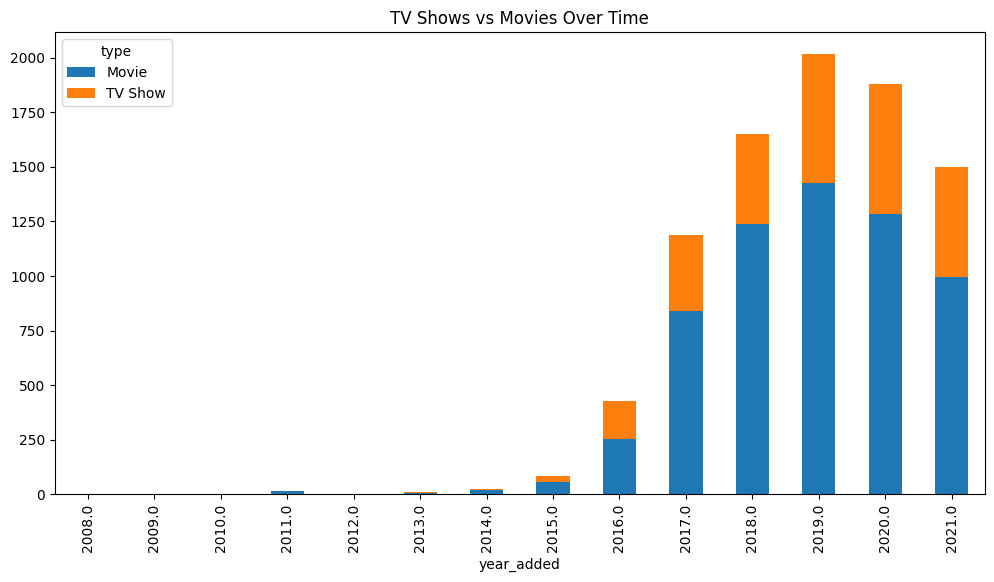

In [18]:
df.groupby(['year_added', 'type']).size().unstack().plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("TV Shows vs Movies Over Time")
plt.show()


##  Are movie durations significantly different from TV show seasons?

Avg Movie Duration: 99.57718668407311
Avg TV Show Seasons: 1.764947683109118


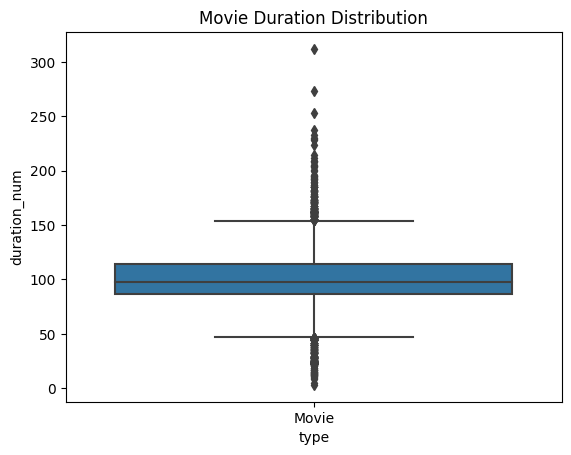

In [19]:
# Only for valid values
movie_durations = df[df['type'] == 'Movie']['duration_num'].dropna()
show_seasons = df[df['type'] == 'TV Show']['duration_num'].dropna()

print("Avg Movie Duration:", movie_durations.mean())
print("Avg TV Show Seasons:", show_seasons.mean())

sns.boxplot(data=df[df['type'] == 'Movie'], x='type', y='duration_num')
plt.title("Movie Duration Distribution")
plt.show()


## Identify Anomalies or Outliers

In [20]:
df[df['duration_num'] > 300]  # Extremely long durations


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,duration_num,duration_unit
4253,s4254,Movie,Black Mirror: Bandersnatch,NaN,"Fionn Whitehead, Will Poulter, Craig Parkinson...",United States,2018-12-28,2018,TV-MA,312 min,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question...",2018.0,12.0,312.0,min
